#  Amazon Alexa Reviews
##   This project is to discover insights into Amazon Alexa reviews using machine learning algorithms.


## EDA & Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('E:/spingboard/project/amazon_alexa.tsv',sep='\t')

In [3]:
print('Shape of DataFrame is {}'.format(df.shape))

Shape of DataFrame is (3150, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [9]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### 1. Rating 

In [8]:
totle_r=df['rating'].count()
#rating_p=[df.loc[df['rating']==1,'rating']/totle_r,df.loc[df['rating']==2,'rating']/totle_r,df.loc[df['rating']==3,'rating']/totle_r,df.loc[df['rating']==4,'rating']/totle_r,loc[df['rating']==5,'rating']/totle_r]
rating_p_1=df.loc[df['rating']==1,'rating'].count()/totle_r
rating_p_2=df.loc[df['rating']==2,'rating'].count()/totle_r
rating_p_3=df.loc[df['rating']==3,'rating']/totle_r/totle_r
rating_p_4=df.loc[df['rating']==4,'rating']/totle_r/totle_r
rating_p_5=df.loc[df['rating']==5,'rating']/totle_r/totle_r


ValueError: setting an array element with a sequence.

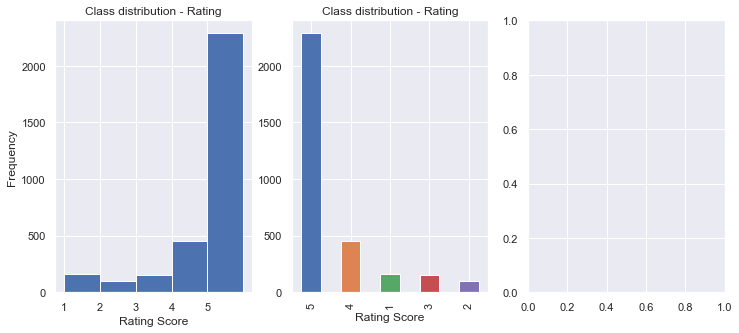

In [9]:
sns.set()
plt.figure(figsize=(12,5))
bin_edges=[1,2,3,4,5,6]

plt.subplot(1,3,1)
df['rating'].plot(kind='hist',bins=bin_edges)
plt.xticks(range(1,6))
plt.title('Class distribution - Rating')
plt.xlabel('Rating Score')

plt.subplot(1,3,2)
df['rating'].value_counts().plot(kind='bar')
plt.title('Class distribution - Rating')
plt.xlabel('Rating Score')

plt.subplot(1,3,3)
x=np.array([1,2,3,4,5])
y=np.array([rating_p_1,rating_p_2,rating_p_3,rating_p_4,rating_p_5])
plt.plot(x,y)
plt.title('Class distribution(%) - Rating')
plt.xlabel('Rating Score')

plt.show()

#### 2. Feedback 

1    2893
0     257
Name: feedback, dtype: int64


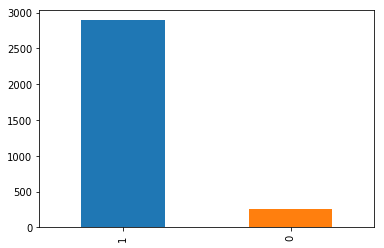

In [12]:
print(df['feedback'].value_counts())

df['feedback'].value_counts().plot(kind='bar')
plt.show()

In [13]:
test = df.copy(deep=True)
test.loc[test['feedback'] == 1, 'feedback'] = 'Positive'
test.loc[test['feedback'] == 0, 'feedback'] = 'Negative'


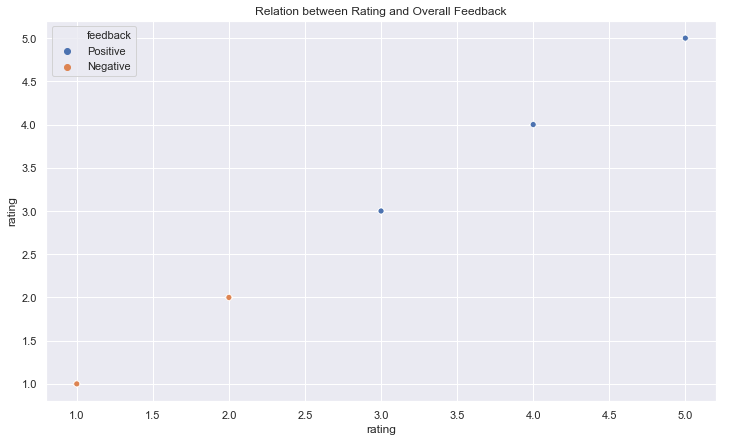

In [12]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="rating", y="rating", hue="feedback",data=test)
plt.title("Relation between Rating and Overall Feedback");

#### 3. variation 

In [13]:
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [ ]:
df['variation'].value_counts(dropna=False)

In [14]:
def FN(x):
    AB=''
    L=x.split()    
    for c in L:        
        AB += c[0]
    return AB

In [15]:
test['Ab_variation']=[FN(x) for x in test['variation']]
print(test.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback Ab_variation  
0                                      Love my Echo!  Positive           CF  
1                                          Loved it!  Positive           CF  
2  Sometimes while playing a game, you can answer...  Positive           WF  
3  I have had a lot of fun with this thing. My 4 ...  Positive           CF  
4                                              Music  Positive           CF  


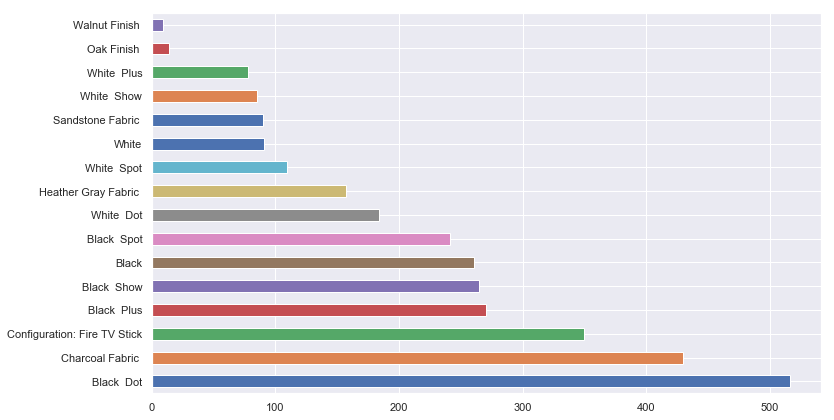

In [16]:
plt.figure(figsize=(12,7))
test['variation'].value_counts().plot(kind='barh')
plt.show()

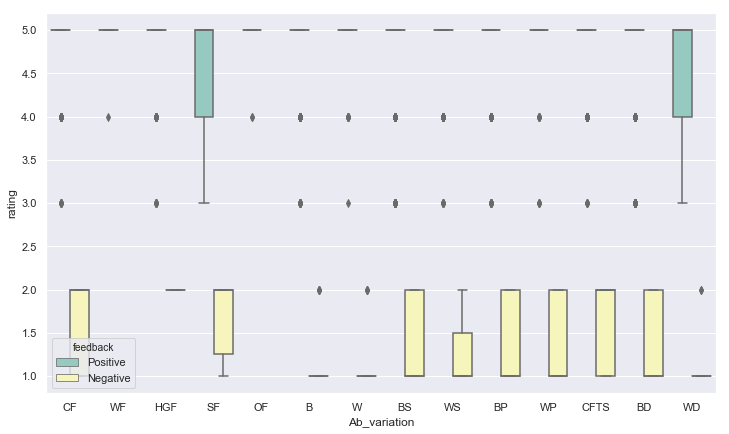

In [17]:
plt.figure(figsize=(12,7))
#fig, ax = plt.subplots(1,2)
#ax[0,0] = sns.boxplot(x="Ab_variation", y="rating",data=test, palette="Set3")
#ax[0,1] = sns.boxplot(x="Ab_variation", y="rating", hue="feedback",data=test, palette="Set3")
ax = sns.boxplot(x="Ab_variation", y="rating", hue="feedback",data=test, palette="Set3")

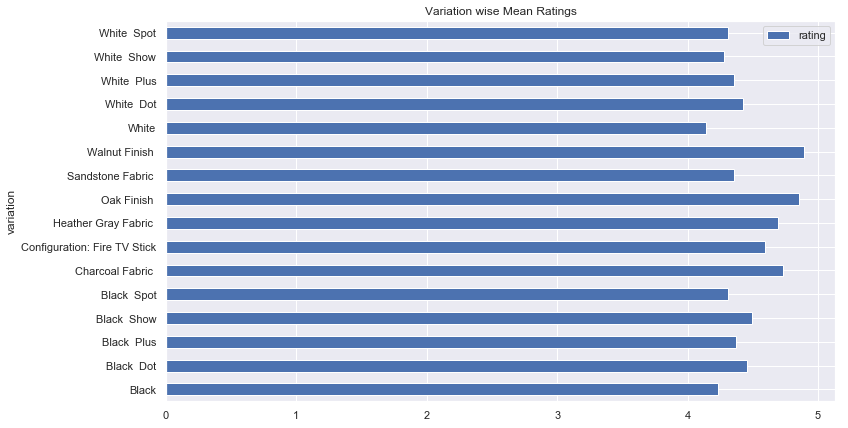

In [18]:
test.groupby('variation').mean()[['rating']].plot.barh(figsize=(12, 7))
plt.title("Variation wise Mean Ratings");

It is found that Walnut Finish, Healther Gray Fabric, and Oak Finish are the most popular variations since they have the highest mean rating and less negative feedback.

#### 4. verified_reviews 

In [22]:
test['verified_reviews'].str.strip()
print(test['verified_reviews'].head())

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object


In [33]:
test.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
Ab_variation        0
review_length       0
dtype: int64

In [48]:
test.loc[test['verified_reviews']==' ','verified_reviews']='NaN'
test.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
review_length       0
dtype: int64

In [24]:
test['review_length']=test['verified_reviews'].str.len()
print(test.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  review_length  
0                                      Love my Echo!  Positive             13  
1                                          Loved it!  Positive              9  
2  Sometimes while playing a game, you can answer...  Positive            195  
3  I have had a lot of fun with this thing. My 4 ...  Positive            172  
4                                              Music  Positive              5  


In [25]:
test['review_length'].describe()
pd.DataFrame(test.review_length.describe()).T

,count,mean,std,min,25%,50%,75%,max
review_length,3150.0,132.099683,182.064109,1.0,30.0,74.0,165.0,2851.0


In [59]:
test['verified_reviews'].describe()
pd.DataFrame(test.verified_reviews.describe()).T

,count,unique,top,freq
verified_reviews,3150,2301,NaN,79


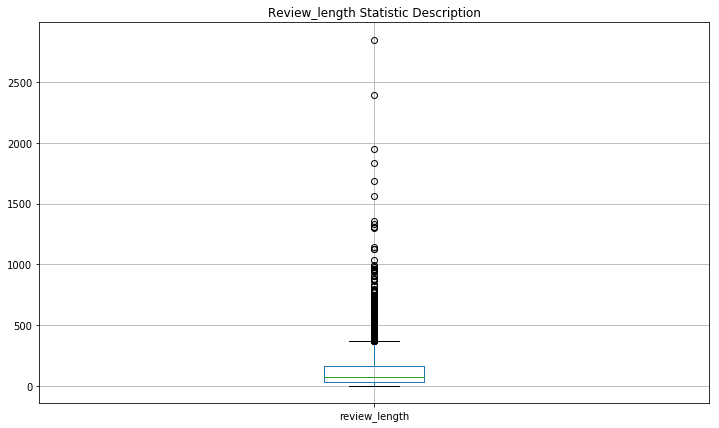

In [26]:
test.boxplot(column='review_length',figsize=(12,7))
plt.title('Review_length Statistic Description')
plt.show()

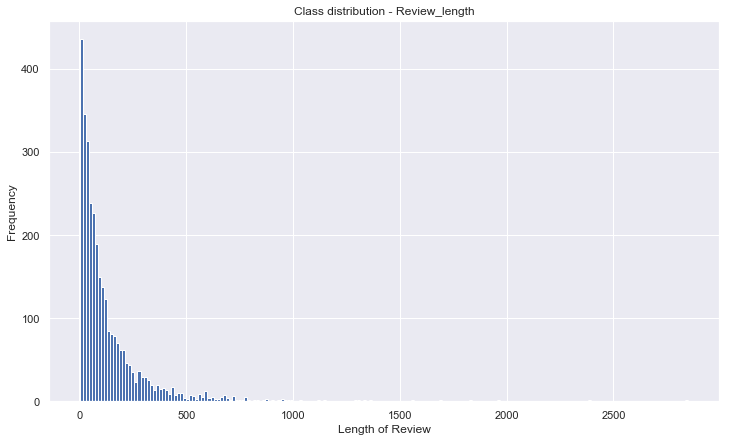

In [73]:
test['review_length'].plot(kind='hist',bins=200,figsize=(12,7))
plt.title('Class distribution - Review_length')
plt.xlabel('Length of Review')
plt.show()

Text(0, 0.5, 'Mean of Length of Review')

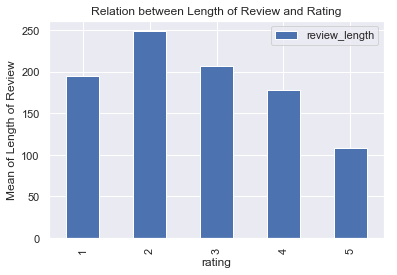

In [88]:
test2=test.groupby('rating').mean()
test2.head()
test2.plot(kind='bar',title='Relation between Length of Review and Rating')
plt.ylabel('Mean of Length of Review')

Text(0, 0.5, 'Mean of Length of Review')

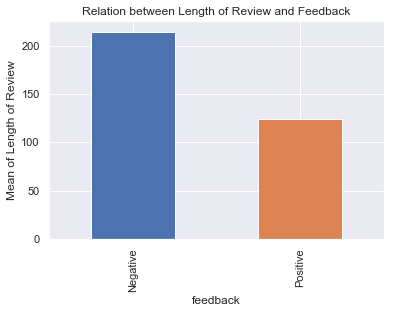

In [87]:
test3=test.groupby('feedback').mean()
test3['review_length'].plot(kind='bar',title='Relation between Length of Review and Feedback')
plt.ylabel('Mean of Length of Review')


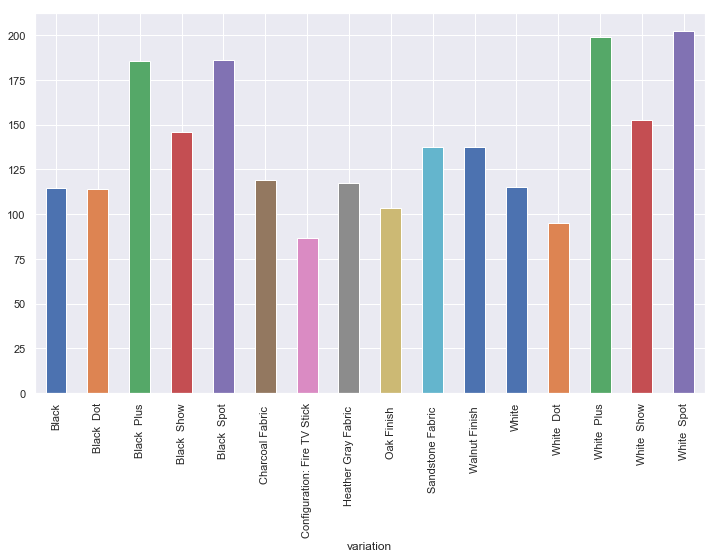

In [91]:
test4=test.groupby('variation').mean()
plt.figure(figsize=(12,7))
test4['review_length'].plot(kind='bar')

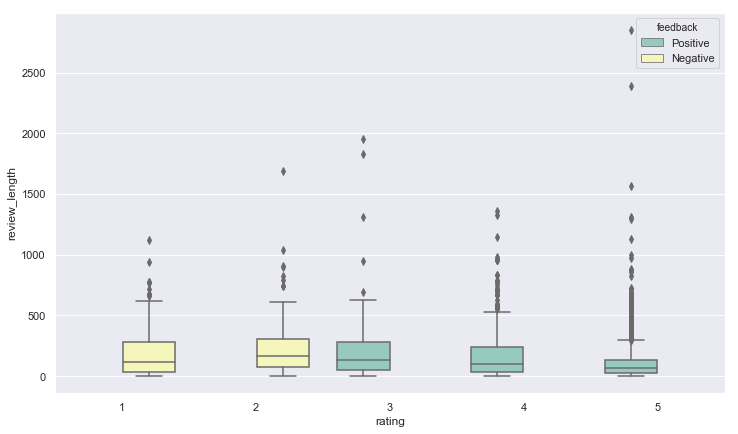

In [81]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(x="rating", y="review_length", hue="feedback",data=test, palette="Set3")

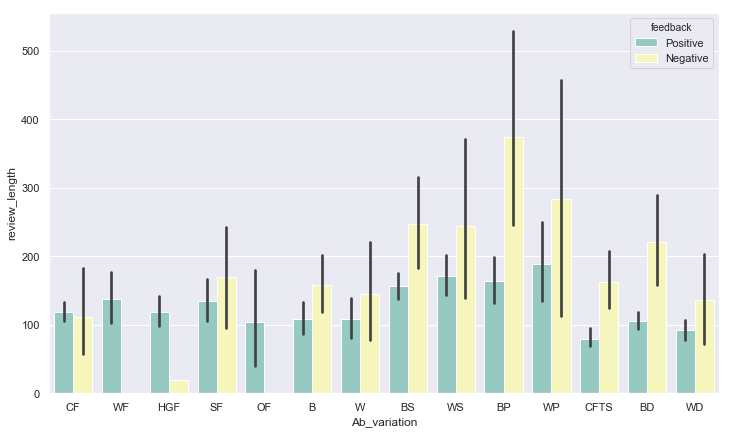

In [96]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x="Ab_variation", y="review_length", hue="feedback",data=test, palette="Set3")

#### Summary
1. Basicly customers like Alexa.
2. WF, HGF and OF are the most popular products.
3. Low level of rating tends to have long reviews. 
4. Negative feedback tends to have long reviews.

## Feature Engineering

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df['review_length']=df['verified_reviews'].str.len()
review = df['verified_reviews']


In [7]:
review_vec = CountVectorizer()
review_X = review_vec.fit_transform(df['verified_reviews'])
review_X

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [8]:
#pd.DataFrame(review_X.toarray(), columns=review_vec.get_feature_names())
features = pd.DataFrame(review_X.toarray(), columns=review_vec.vocabulary_)
print(features)

      love  my  echo  loved  it  sometimes  while  playing  game  you   ...    \
0        0   0     0      0   0          0      0        0     0    0   ...     
1        0   0     0      0   0          0      0        0     0    0   ...     
2        0   0     0      0   0          0      0        0     0    0   ...     
3        0   0     0      0   0          0      0        0     0    0   ...     
4        0   0     0      0   0          0      0        0     0    0   ...     
5        0   0     0      0   0          0      0        0     0    0   ...     
6        0   0     0      0   0          0      0        0     0    0   ...     
7        0   0     0      0   0          0      0        0     0    0   ...     
8        0   0     0      0   0          0      0        0     0    0   ...     
9        0   0     0      0   0          0      0        0     0    0   ...     
10       0   0     0      0   0          0      0        0     0    0   ...     
11       0   0     0      0 

In [9]:
features = features.join(df[['review_length', 'variation']], rsuffix='_base')
features = pd.get_dummies(features)
features.columns

Index(['love', 'my', 'echo', 'loved', 'it', 'sometimes', 'while', 'playing',
       'game', 'you',
       ...
       'variation_Configuration: Fire TV Stick',
       'variation_Heather Gray Fabric ', 'variation_Oak Finish ',
       'variation_Sandstone Fabric ', 'variation_Walnut Finish ',
       'variation_White', 'variation_White  Dot', 'variation_White  Plus',
       'variation_White  Show', 'variation_White  Spot'],
      dtype='object', length=4061)

In [10]:
target = df[['feedback']].astype(int)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [13]:
model = RandomForestClassifier()

In [14]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv_object = StratifiedKFold(n_splits=5)

grid = GridSearchCV(estimator=model, param_grid=params, cv=cv_object, verbose=0, return_train_score=True)
grid.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [80, 100], 'min_samples_split': [8, 12], 'n_estimators': [100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [16]:
pd.crosstab(y_train['feedback'], grid.predict(x_train), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,153,57,210
1,0,2310,2310
All,153,2367,2520


In [17]:
print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("="*70)
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

Mean Cross Validation Accuracy - Train Set : 97.23090277777779
Mean Cross Validation Accuracy - Validation Set : 92.55456349206351
